# Lab 6.01 - Regression analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).


1. Import the dataset `Cats.csv`.


In [2]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables.


<Axes: xlabel='Hwt', ylabel='Bwt'>

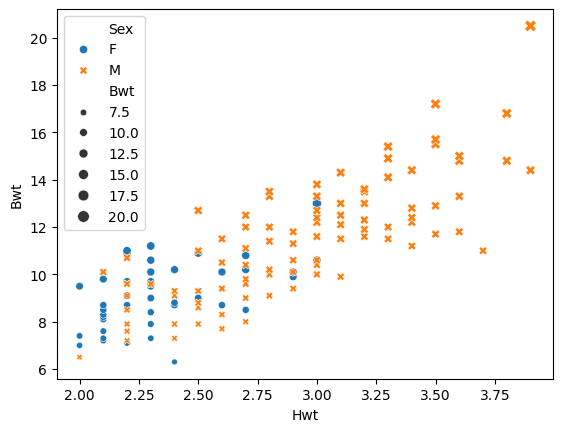

In [4]:
sns.scatterplot(data=cats,x='Hwt',y='Bwt',size='Bwt', hue='Sex', style='Sex')



3. Calculate and draw the regression line.


In [ ]:
cats_x = cats.Hwt.values.reshape(-1,1)
cats_y = cats.Bwt

weight_model = LinearRegression().fit(cats_x,cats_y)

print(f"Regression line: ŷ = {weight_model.intercept_:.4f} + {weight_model.coef_[0]:.4f} x")

Regression line: ŷ = -0.3511 + 4.0318 x


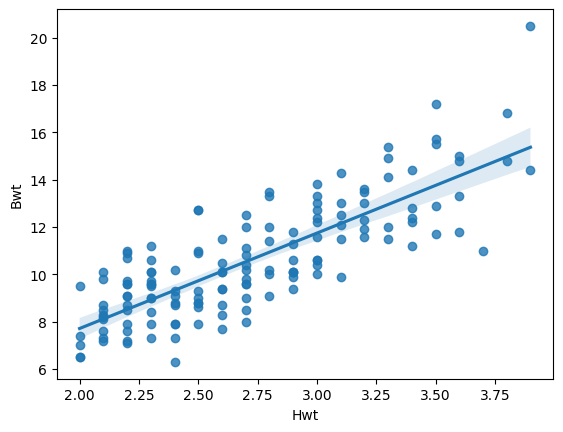

In [6]:
sns.regplot(data=cats, x='Hwt',y='Bwt');


4. Calculate the correlation coefficient and the coefficient of determination.

In [8]:
corr=np.corrcoef(cats.Hwt,cats.Bwt)[0][1]

cor2 = corr**2
print(f"R ≈ {corr:.4f}")
print(cor2)

R ≈ 0.8041
0.6466327561709654


5. Interpret the results from the previous steps.

### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


In [9]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables for each gender.


<Axes: xlabel='Hwt', ylabel='Bwt'>

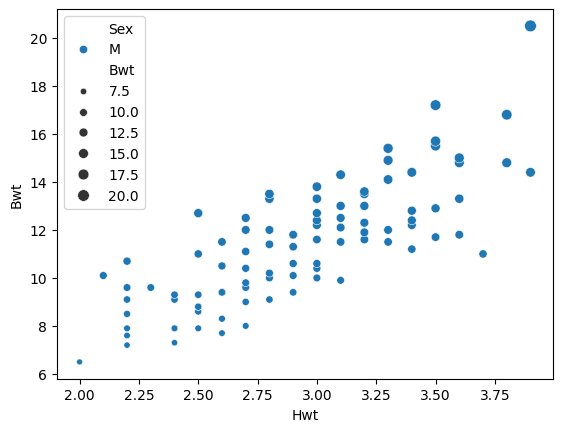

In [11]:
cats_male = cats[cats['Sex']=='M']
cats_female = cats[cats['Sex'] =='F']
cats_male.describe()
sns.scatterplot(data=cats_male,x='Hwt',y='Bwt',size='Bwt', hue='Sex', style='Sex')


<Axes: xlabel='Hwt', ylabel='Bwt'>

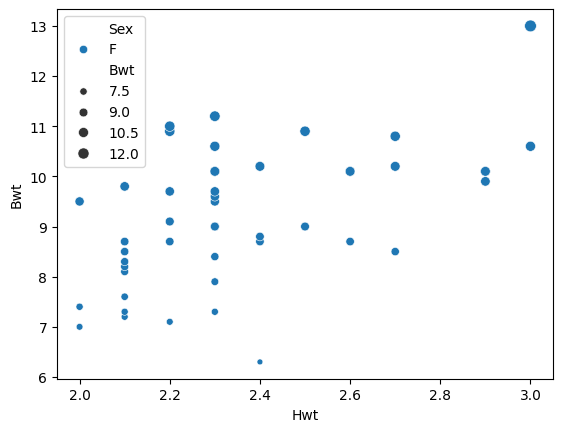

In [12]:
sns.scatterplot(data=cats_female,x='Hwt',y='Bwt',size='Bwt', hue='Sex', style='Sex')


3. Calculate and draw the regression line.


Regression line: ŷ = -1.1768 + 4.3098 x


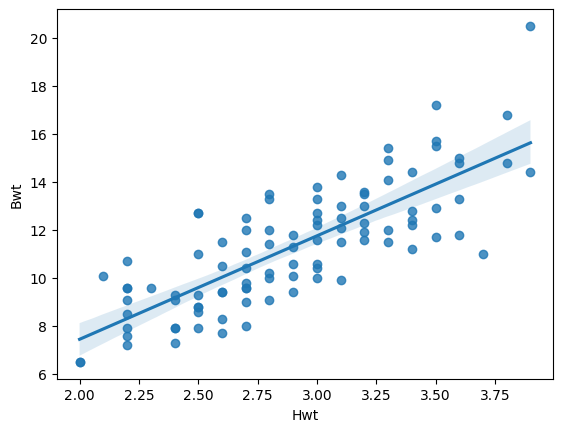

In [14]:
cats_m_x =cats_male.Hwt.values.reshape(-1,1)
cats_m_y = cats_male.Bwt

weight_model = LinearRegression().fit(cats_m_x,cats_m_y)

print(f"Regression line: ŷ = {weight_model.intercept_:.4f} + {weight_model.coef_[0]:.4f} x")
sns.regplot(data=cats_male, x='Hwt',y='Bwt');


In [15]:
cats_f_x =cats_female.Hwt.values.reshape(-1,1)
cats_f_y = cats_female.Bwt

weight_model = LinearRegression().fit(cats_f_x,cats_f_y)

print(f"Regression line: ŷ = {weight_model.intercept_:.4f} + {weight_model.coef_[0]:.4f} x")

Regression line: ŷ = 2.9813 + 2.6364 x


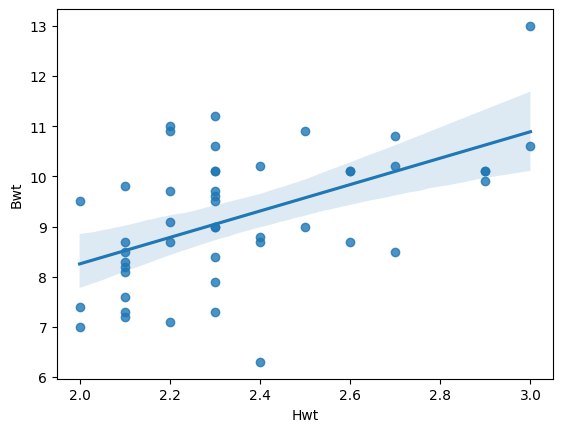

In [16]:
sns.regplot(data=cats_female, x='Hwt',y='Bwt');


4. Calculate the correlation coefficient and the coefficient of determination.


In [17]:
corr = np.corrcoef(cats_male.Hwt,cats_male.Bwt)[0][1]
cor2 = corr**2
print(corr)
print(cor2)


0.7930443171812304
0.628919289013444


In [18]:
corr = np.corrcoef(cats_female.Hwt,cats_female.Bwt)[0][1]
cor2 = corr**2
print(corr)
print(cor2)

0.5320496665060397
0.28307684762918806


5. Interpret the results from the previous steps.

### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |
